In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from google.colab import files
uploaded =files.upload()


Saving heart[1].csv to heart[1].csv


In [14]:
df = pd.read_csv("heart[1].csv")

In [15]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- exang >  0.50
|   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- class: 0
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- chol <= 233.50
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  233.50
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  109.00
|   |   |   |--- age <= 63.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  63.50
|   |   |   |   |--- class: 0
|--- cp >  0.50
|   |--- thal <= 2.50
|   |   |--- oldpeak <= 2.10
|   |   |   |--- age <= 55.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  55.50
|   |   |   |   |--- class: 1
|   |   |--- oldpeak >  2.10
|   |   |   |--- slope <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- slope >  0.50
|   |   |   |   |--- class: 

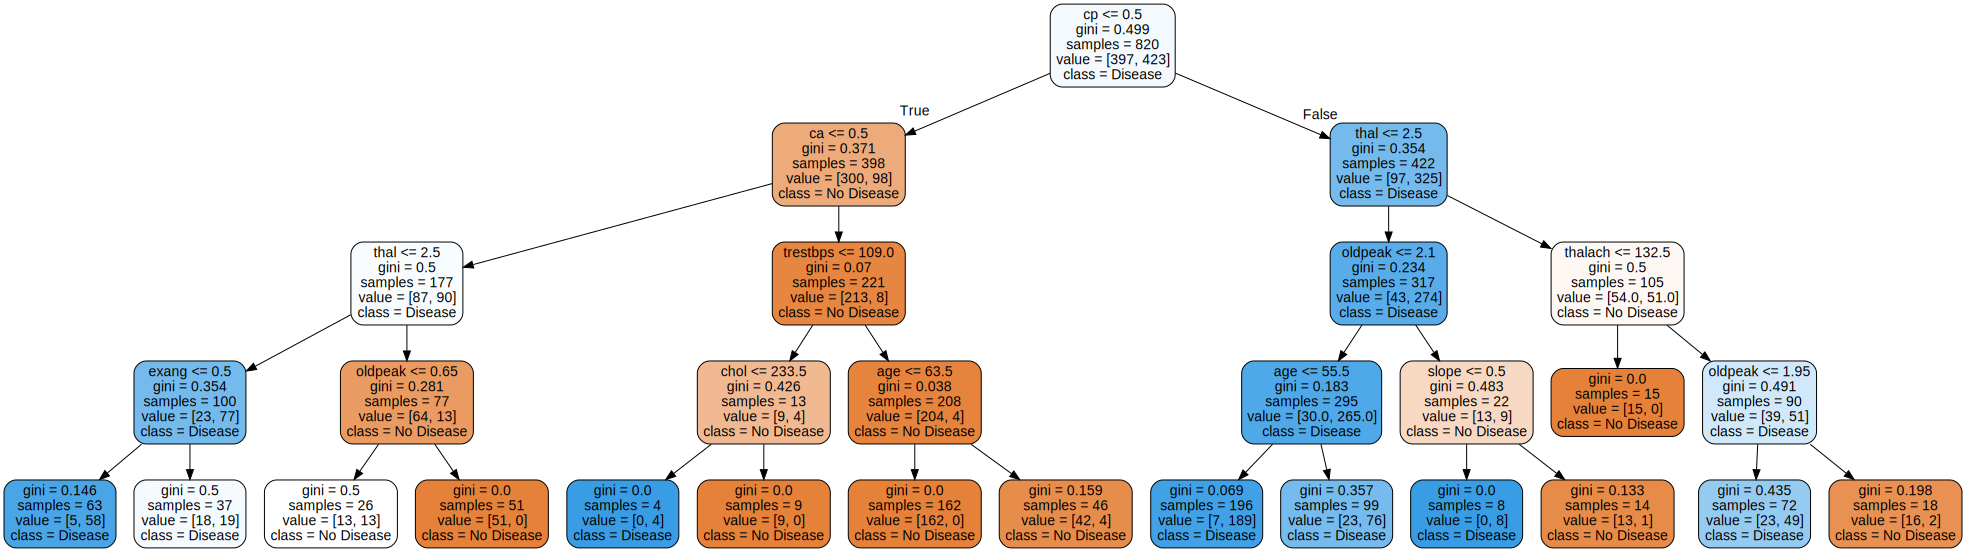

In [19]:
print(export_text(dtree, feature_names=list(X.columns)))
export_graphviz(
    dtree,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



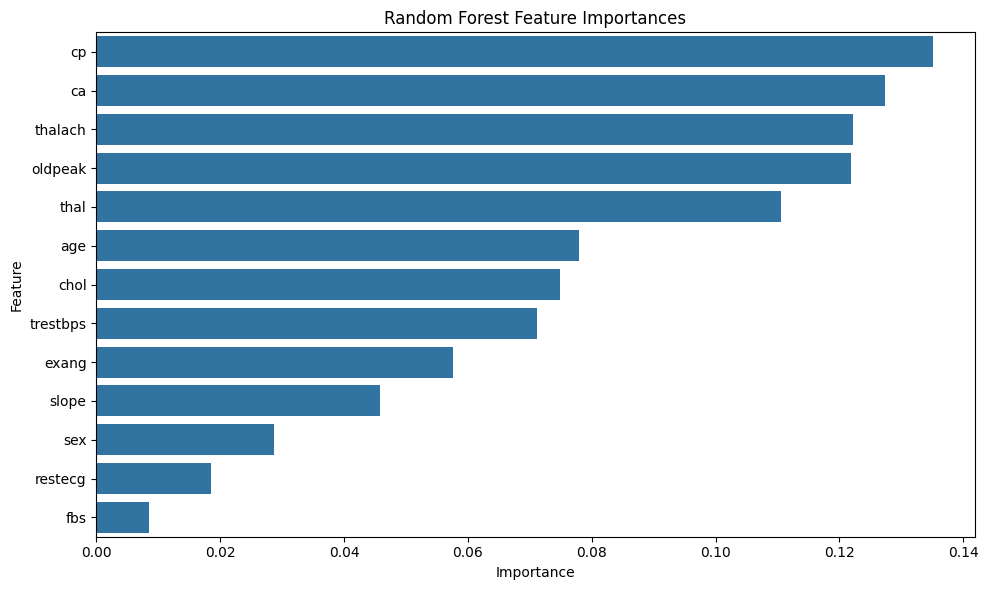

In [21]:
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [22]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV accuracy: 0.9970731707317073
